In [1]:
#!pip install graphviz


# Load DataSet digits

In [8]:
from sklearn import datasets,metrics
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [9]:
digits = datasets.load_digits()

In [10]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

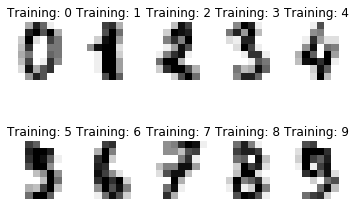

In [11]:
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:10]):
    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

# Split data into training and validation

In [12]:
num_examples = len(digits.data)
num_split = int(0.7*num_examples)
train_features = digits.data[:num_split]
train_labels =  digits.target[:num_split]
test_features = digits.data[num_split:]
test_labels = digits.target[num_split:]


In [13]:
print("Number of training examples: ",len(train_features))
print("Number of test examples: ",len(test_features))
print("Number of total examples:", len(train_features)+len(test_features))

Number of training examples:  1257
Number of test examples:  540
Number of total examples: 1797


# Create a classifier

In [23]:
classifier = DecisionTreeClassifier(min_samples_leaf = 1)

In [24]:
classifier.fit(train_features, train_labels)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [25]:
predicted = classifier.predict(test_features)


In [26]:
print("Classification report for classifier %s: \n%s\n"
     % (classifier, metrics.classification_report(test_labels, predicted)))

Classification report for classifier DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best'): 
              precision    recall  f1-score   support

           0       0.85      0.87      0.86        53
           1       0.79      0.70      0.74        53
           2       0.90      0.72      0.80        53
           3       0.71      0.70      0.70        53
           4       0.80      0.86      0.83        57
           5       0.89      0.84      0.86        56
           6       0.87      0.85      0.86        54
           7       0.85      0.96      0.90        54
           8       0.72      0.65      0.69        52
           9   

In [27]:
print("Confusion matrix:\n%s" % metrics.confusion_matrix(test_labels, predicted))

Confusion matrix:
[[46  0  0  0  4  0  0  0  1  2]
 [ 0 37  0  5  0  0  1  2  3  5]
 [ 2  2 38  5  0  0  3  0  2  1]
 [ 0  1  0 37  0  4  0  2  5  4]
 [ 3  0  0  0 49  0  2  2  0  1]
 [ 2  0  1  0  3 47  1  0  1  1]
 [ 0  1  0  1  1  0 46  0  0  5]
 [ 0  0  0  0  1  0  0 52  0  1]
 [ 0  6  3  1  1  0  0  3 34  4]
 [ 1  0  0  3  2  2  0  0  1 46]]


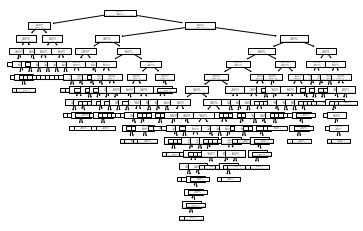

In [28]:
tree.plot_tree(classifier);

# graphviz representation

In [29]:
from sklearn import tree

In [30]:
import graphviz 
dot_data = tree.export_graphviz(classifier, out_file=None) 
graph = graphviz.Source(dot_data) 
# graph.render("DT") 

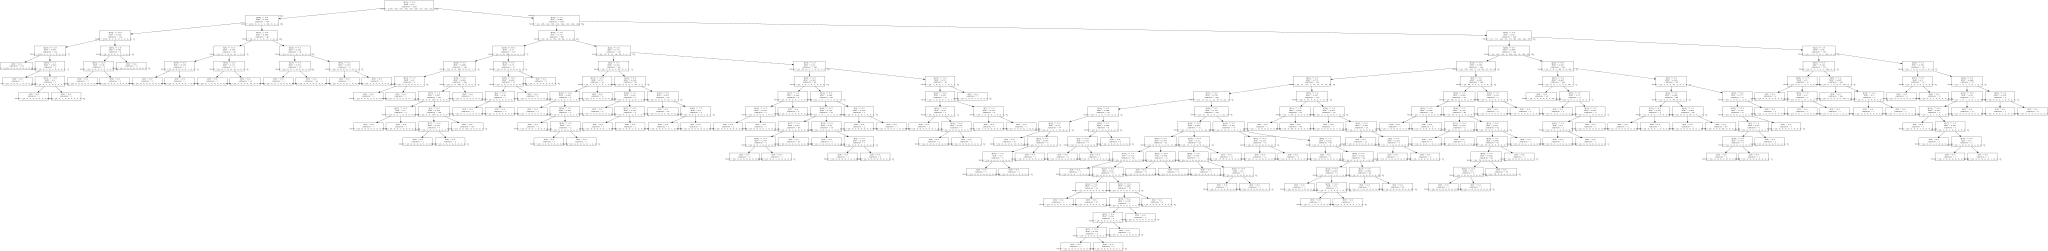

In [31]:
graph